In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sc_stats
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})

## Function declarations

### Read `ods` to `DataFrame`



In [3]:
def read_ods(filename, columns):
  key_arr = (k for k in columns.keys())
  df = pd.read_excel(filename, engine="odf", header=0,
                     usecols=columns)
  df = df.rename(columns=columns)
  return df


In [4]:
filename = "02-table-07-daily-number-customer-repair-work.ods"
df = read_ods(filename, {"Time": "t", "Customers": "Y_t"})
df

,t,Y_t
0,1,58
1,2,54
2,3,60
3,4,55
4,5,62
5,6,62
6,7,65
7,8,63
8,9,70


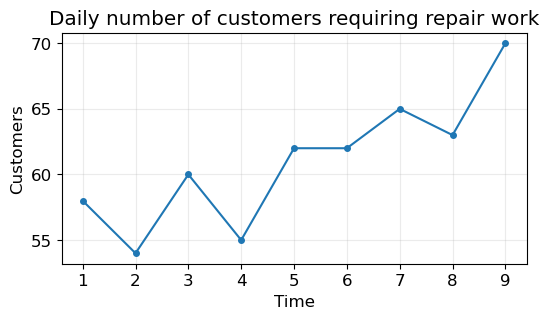

In [5]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df["t"], df["Y_t"], marker='o', markersize=4)
ax.set_xlabel("Time")
ax.set_ylabel("Customers")
ax.set_title("Daily number of customers requiring repair work")
ax.grid("on")
plt.show(fig)


In [6]:
df_table = df.copy()
df_table["hat_Y_t"] = df_table["Y_t"].shift(1)
df_table["e_t"] = df_table["Y_t"] - df_table["hat_Y_t"]
df_table["abs_e_t"] = df_table["e_t"].abs()
df_table["e_t_sq"] = df_table["e_t"]**2
df_table["abs_e_t/Y_t"] = df_table["abs_e_t"] / df_table["Y_t"]
df_table["e_t/Y_t"] = df_table["e_t"] / df_table["Y_t"]
df_table

,t,Y_t,hat_Y_t,e_t,abs_e_t,e_t_sq,abs_e_t/Y_t,e_t/Y_t
0,1,58,NaN,NaN,NaN,NaN,NaN,NaN
1,2,54,58.0,-4.0,4.0,16.0,0.074074,-0.074074
2,3,60,54.0,6.0,6.0,36.0,0.100000,0.100000
3,4,55,60.0,-5.0,5.0,25.0,0.090909,-0.090909
4,5,62,55.0,7.0,7.0,49.0,0.112903,0.112903
5,6,62,62.0,0.0,0.0,0.0,0.000000,0.000000
6,7,65,62.0,3.0,3.0,9.0,0.046154,0.046154
7,8,63,65.0,-2.0,2.0,4.0,0.031746,-0.031746
8,9,70,63.0,7.0,7.0,49.0,0.100000,0.100000


In [7]:
MAD_df_table = df_table["abs_e_t"].mean()  #NaN is not included
MSE_df_table = df_table["e_t_sq"].mean()
RMSE_df_table = np.sqrt(MSE_df_table)
MAPE_df_table = df_table["abs_e_t/Y_t"].mean()
MPE_df_table = df_table["e_t/Y_t"].mean()

print(f" MAD df_table: {MAD_df_table}")
print(f" MSE df_table: {MSE_df_table}")
print(f"RMSE df_table: {RMSE_df_table:.3f}")
print(f"MAPE df_table: {MAPE_df_table:.4f} ({MAPE_df_table*100:.2f}%)")
print(f" MPE df_table: {MPE_df_table:.4f} ({MPE_df_table*100:.2f}%)")


 MAD df_table: 4.25
 MSE df_table: 23.5
RMSE df_table: 4.848
MAPE df_table: 0.0695 (6.95%)
 MPE df_table: 0.0203 (2.03%)
